In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('accident.csv')

In [6]:
df.shape

(37654, 80)

In [7]:
df.head()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,1,1,0,1,1,...,20,22,10:00pm-10:59pm,45,45,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
1,1,Alabama,10002,0,0,1,1,0,1,1,...,8,2,2:00am-2:59am,23,23,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
2,1,Alabama,10003,0,0,1,1,0,1,1,...,48,23,11:00pm-11:59pm,8,8,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,3,3,...,0,19,7:00pm-7:59pm,44,44,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,1,1,0,4,4,...,53,15,3:00pm-3:59pm,8,8,99,Unknown,99,Unknown EMS Hospital Arrival Time,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37654 entries, 0 to 37653
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         37654 non-null  int64  
 1   STATENAME     37654 non-null  object 
 2   ST_CASE       37654 non-null  int64  
 3   PEDS          37654 non-null  int64  
 4   PERNOTMVIT    37654 non-null  int64  
 5   VE_TOTAL      37654 non-null  int64  
 6   VE_FORMS      37654 non-null  int64  
 7   PVH_INVL      37654 non-null  int64  
 8   PERSONS       37654 non-null  int64  
 9   PERMVIT       37654 non-null  int64  
 10  COUNTY        37654 non-null  int64  
 11  COUNTYNAME    37654 non-null  object 
 12  CITY          37654 non-null  int64  
 13  CITYNAME      37654 non-null  object 
 14  MONTH         37654 non-null  int64  
 15  MONTHNAME     37654 non-null  object 
 16  DAY           37654 non-null  int64  
 17  DAYNAME       37654 non-null  int64  
 18  DAY_WEEK      37654 non-nu

In [15]:
df.isnull().sum().sum()

5512

In [12]:
len(df)

37654

In [13]:
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [14]:
df.isnull().sum().sum()

5512

In [16]:
df = df.dropna(subset=['LATITUDE', 'LONGITUD', 'WEATHERNAME', 'FATALS'])

In [17]:
df.isnull().sum().sum()

5512

In [18]:
df.shape

(37654, 78)

In [19]:
df['HOUR'] = pd.to_numeric(df['HOUR'], errors='coerce')

In [20]:
df['Time_Of_Day'] = df['HOUR'].apply(
    lambda x: 'Night' if x < 6 else 'Morning' if x < 12 else 'Afternoon' if x < 18 else 'Evening'
)

In [21]:
df['LOCATION'] = df['CITYNAME'].fillna('') + ', ' + df['STATENAME'].fillna('')

In [22]:
df.shape

(37654, 80)

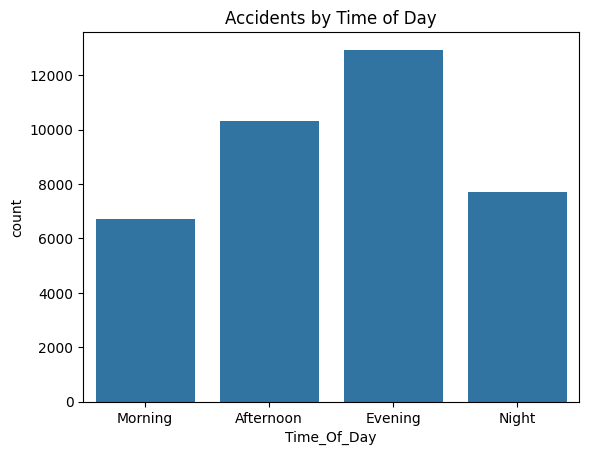

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Time_Of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Accidents by Time of Day')
plt.show()


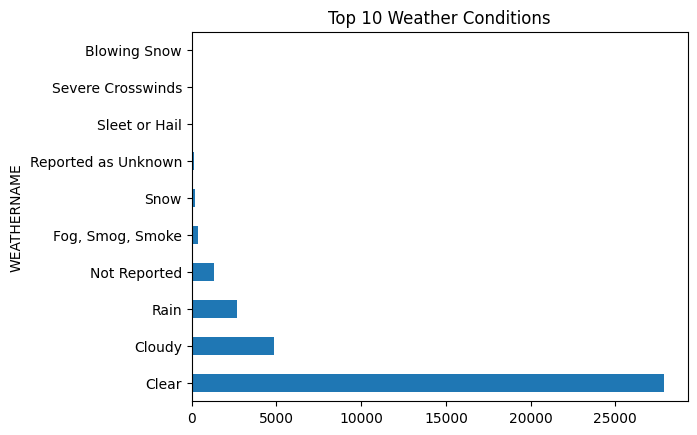

In [24]:
df['WEATHERNAME'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Weather Conditions')
plt.show()

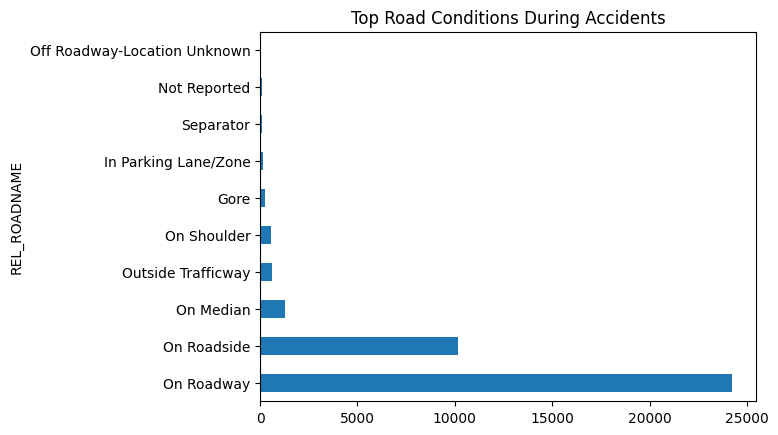

In [25]:
df['REL_ROADNAME'].value_counts().head(10).plot(kind='barh')
plt.title('Top Road Conditions During Accidents')
plt.show()

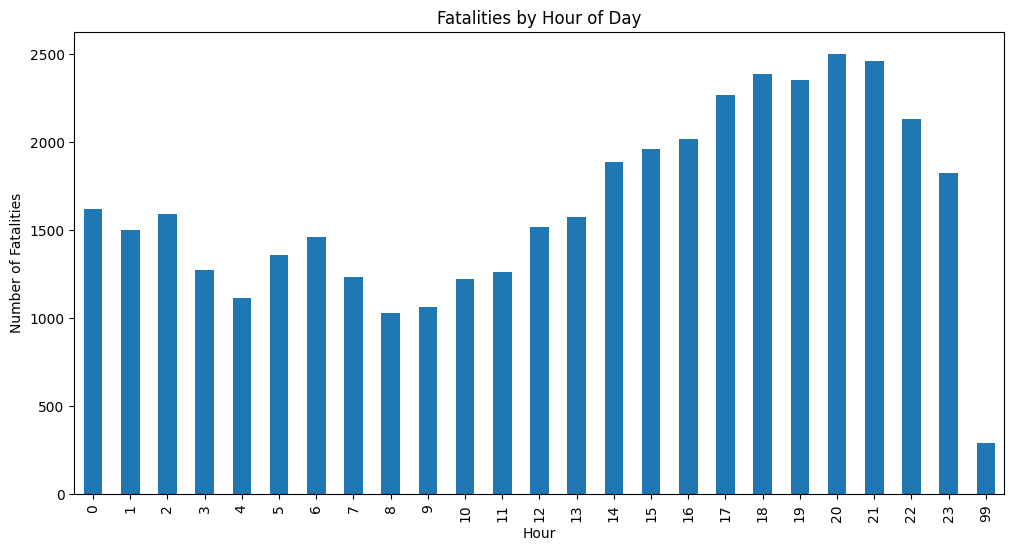

In [26]:
df.groupby('HOUR')['FATALS'].sum().plot(kind='bar', figsize=(12,6))
plt.title('Fatalities by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Fatalities')
plt.show()

In [27]:
df.groupby('WEATHERNAME')['FATALS'].mean().sort_values(ascending=False).head(10)


WEATHERNAME
Blowing Sand, Soil, Dirt    1.666667
Blowing Snow                1.194444
Severe Crosswinds           1.159091
Fog, Smog, Smoke            1.117794
Snow                        1.112613
Sleet or Hail               1.111111
Clear                       1.087579
Cloudy                      1.082991
Rain                        1.076226
Not Reported                1.070552
Name: FATALS, dtype: float64

In [28]:
import folium
from folium.plugins import HeatMap

# Base map centered over USA
map = folium.Map(location=[39.5, -98.35], zoom_start=4)

# Subset for performance
sample = df[['LATITUDE', 'LONGITUD']].dropna().sample(5000)

# Add heatmap
HeatMap(data=sample.values.tolist()).add_to(map)

# Save map
map.save("accident_hotspots.html")


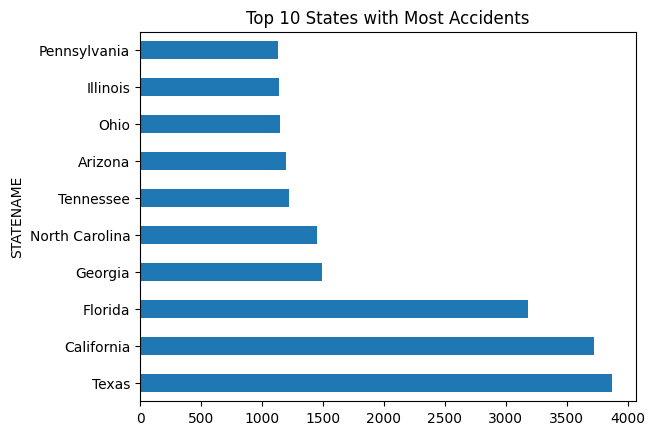

In [30]:
df['STATENAME'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 States with Most Accidents')
plt.show()

In [31]:
df.isnull().sum().sort_values(ascending=False).head(20)

MILEPTNAME      5511
TWAY_ID            1
STATE              0
RELJCT2NAME        0
LGT_COND           0
WRK_ZONE           0
REL_ROADNAME       0
REL_ROAD           0
TYP_INTNAME        0
TYP_INT            0
RELJCT2            0
WEATHER            0
RELJCT1NAME        0
RELJCT1            0
MAN_COLLNAME       0
MAN_COLL           0
HARM_EVNAME        0
HARM_EV            0
LONGITUDNAME       0
LGT_CONDNAME       0
dtype: int64

In [32]:
df.describe()

,STATE,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,COUNTY,...,LGT_COND,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,FATALS
count,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,...,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000,37654.000000
mean,27.304350,273893.087375,0.246640,0.258751,1.588809,1.548813,0.039996,2.207282,2.195172,92.568837,...,1.982286,6.082116,0.003081,58.696925,68.086339,60.323259,69.367690,76.548282,80.071493,1.086233
std,16.490819,164823.148700,0.492486,0.523579,0.842440,0.803674,0.282445,1.691668,1.684175,98.855373,...,1.215709,18.709699,0.055419,43.164030,36.384085,43.005261,36.158108,33.463910,28.068737,0.353643
min,1.000000,10001.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12.000000,121977.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,31.000000,...,1.000000,1.000000,0.000000,15.000000,33.000000,15.000000,35.000000,88.000000,88.000000,1.000000
50%,27.000000,270059.500000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,71.000000,...,2.000000,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,1.000000
75%,42.000000,420770.750000,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,3.000000,115.000000,...,3.000000,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000
max,56.000000,560121.000000,19.000000,19.000000,35.000000,35.000000,9.000000,52.000000,52.000000,999.000000,...,9.000000,99.000000,1.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000


In [33]:
df['FATALS'].value_counts()
df['WEATHERNAME'].value_counts()
df['HOUR'].value_counts()


HOUR
20    2307
21    2280
18    2237
19    2194
17    2099
22    1978
16    1854
15    1794
14    1724
23    1666
0     1480
13    1451
2     1434
12    1397
1     1361
6     1349
5     1269
7     1160
11    1152
3     1122
10    1109
4     1025
9      991
8      939
99     282
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df['is_fatal'] = df['FATALS'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
selected_features = [
    'HOUR', 'DAY_WEEK', 'WEATHERNAME', 'LGT_CONDNAME', 'FUNC_SYSNAME',
    'RELJCT1NAME', 'TYP_INTNAME', 'REL_ROADNAME', 'WRK_ZONE', 'MONTH'
]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37654 entries, 0 to 37653
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         37654 non-null  int64  
 1   STATENAME     37654 non-null  object 
 2   ST_CASE       37654 non-null  int64  
 3   PEDS          37654 non-null  int64  
 4   PERNOTMVIT    37654 non-null  int64  
 5   VE_TOTAL      37654 non-null  int64  
 6   VE_FORMS      37654 non-null  int64  
 7   PVH_INVL      37654 non-null  int64  
 8   PERSONS       37654 non-null  int64  
 9   PERMVIT       37654 non-null  int64  
 10  COUNTY        37654 non-null  int64  
 11  COUNTYNAME    37654 non-null  object 
 12  CITY          37654 non-null  int64  
 13  CITYNAME      37654 non-null  object 
 14  MONTH         37654 non-null  int64  
 15  MONTHNAME     37654 non-null  object 
 16  DAY           37654 non-null  int64  
 17  DAYNAME       37654 non-null  int64  
 18  DAY_WEEK      37654 non-nu

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
df[selected_features].isnull().sum()

HOUR            0
DAY_WEEK        0
WEATHERNAME     0
LGT_CONDNAME    0
FUNC_SYSNAME    0
RELJCT1NAME     0
TYP_INTNAME     0
REL_ROADNAME    0
WRK_ZONE        0
MONTH           0
dtype: int64

In [46]:
df_clean = df[selected_features + ['is_fatal']].dropna()

In [47]:
df_clean.head()

,HOUR,DAY_WEEK,WEATHERNAME,LGT_CONDNAME,FUNC_SYSNAME,RELJCT1NAME,TYP_INTNAME,REL_ROADNAME,WRK_ZONE,MONTH,is_fatal
0,22,4,Clear,Dark - Not Lighted,Major Collector,No,Not an Intersection,On Roadside,0,1,1
1,2,2,Clear,Dark - Not Lighted,Local,No,Not an Intersection,On Roadside,0,3,1
2,22,7,Clear,Dark - Not Lighted,Major Collector,No,Not an Intersection,On Roadside,0,3,1
3,19,6,Rain,Dark - Not Lighted,Local,No,Not an Intersection,On Roadside,0,3,1
4,14,6,Rain,Daylight,Interstate,No,Not an Intersection,On Roadside,0,3,1


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37654 entries, 0 to 37653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HOUR          37654 non-null  int64 
 1   DAY_WEEK      37654 non-null  int64 
 2   WEATHERNAME   37654 non-null  object
 3   LGT_CONDNAME  37654 non-null  object
 4   FUNC_SYSNAME  37654 non-null  object
 5   RELJCT1NAME   37654 non-null  object
 6   TYP_INTNAME   37654 non-null  object
 7   REL_ROADNAME  37654 non-null  object
 8   WRK_ZONE      37654 non-null  int64 
 9   MONTH         37654 non-null  int64 
 10  is_fatal      37654 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.2+ MB


In [49]:
df_encoded = pd.get_dummies(df_clean, columns=[
    'WEATHERNAME', 'LGT_CONDNAME', 'FUNC_SYSNAME',
    'RELJCT1NAME', 'TYP_INTNAME', 'REL_ROADNAME'
], drop_first=True)

In [52]:
X=df_encoded.drop(columns='is_fatal')
y=df_encoded['is_fatal']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred=model.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[7531]], dtype=int64)

In [57]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00      7531\n\n    accuracy                           1.00      7531\n   macro avg       1.00      1.00      1.00      7531\nweighted avg       1.00      1.00      1.00      7531\n'

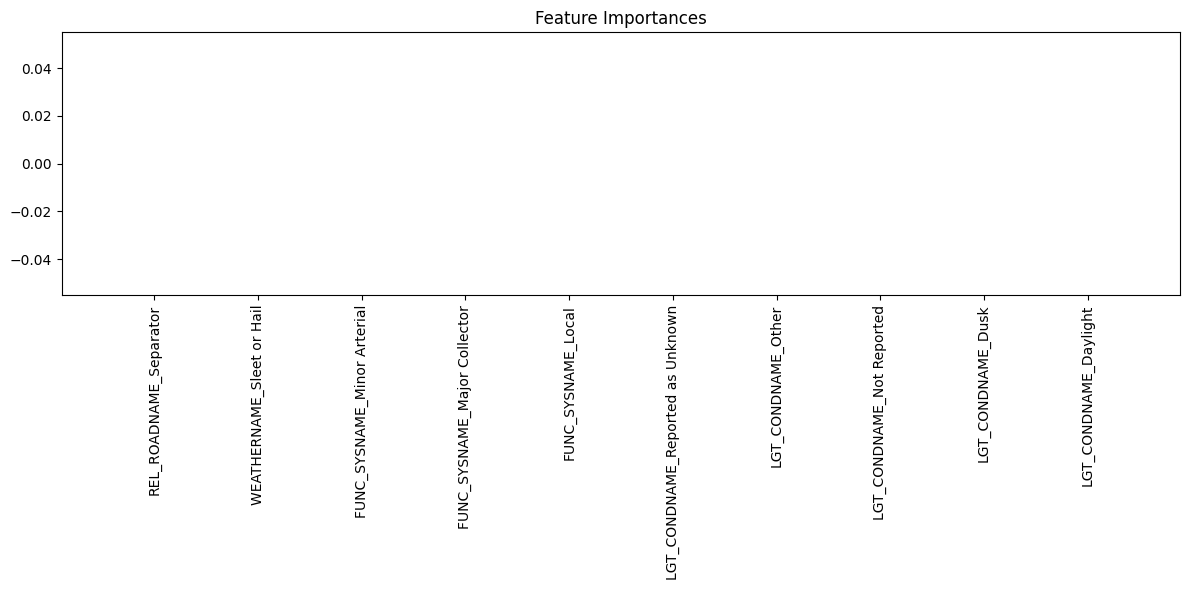

In [58]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_pred,y_test)

1.0